# Proyek Klasifikasi Gambar dengan KNN
Proyek ini bertujuan untuk melakukan klasifikasi gambar menggunakan model K-Nearest Neighbors (KNN). Berikut adalah langkah-langkah yang dilakukan dalam proyek ini:
1. **Import Library**
2. **Praproses Data**
3. **Pelatihan Model**
4. **Evaluasi dan Visualisasi Hasil**
5. **Kesimpulan**

Setiap langkah akan dijelaskan lebih rinci pada bagian berikutnya.

# LOAD DATASET

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d fthnaja/kain-ulos
!unzip kain-ulos.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/fthnaja/kain-ulos
License(s): MIT
100% 2.46G/2.47G [01:50<00:00, 15.7MB/s]
100% 2.47G/2.47G [01:50<00:00, 23.9MB/s]
Archive:  kain-ulos.zip
  inflating: Test/Pinuncaan/IMG_20240611_201106.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201107.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201107_1.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201107_11.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201108.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201108_1.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201108_11.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201108_2.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201108_22.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201109.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201110.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201114 4.jpg  
  inflating: Test

## DATA UNDERSTANDING

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import cv2
import imghdr
from collections import Counter
from PIL import Image  # Pastikan import ini ada
import tensorflow as tf
tf.random.set_seed(1234)

warnings.filterwarnings('ignore')

In [ ]:
train_path = "Train"
test_path = "Test"

img_classes = os.listdir(train_path)
print(f"Classes inside the dataset: {img_classes}")

Classes inside the dataset: ['Tumtuman', 'Sadum', 'Sibolang', 'Ragi Hidup', 'Ragi Hotang', 'Pinuncaan']


## Memeriksa Distribusi Kelas di Dataset

In [ ]:
# Fungsi untuk mendapatkan distribusi jumlah gambar per kelas
def get_class_distribution(path):
    class_counts = {cls: len(os.listdir(os.path.join(path, cls))) for cls in img_classes}
    total_images = sum(class_counts.values())
    return class_counts, total_images

In [ ]:
# Menampilkan distribusi dataset
train_distribution, total_train_images = get_class_distribution(train_path)
test_distribution, total_test_images = get_class_distribution(test_path)

print("Train Dataset Distribution:")
for cls, count in train_distribution.items():
    print(f"  - {cls}: {count} images")
print(f"Total images in Train dataset: {total_train_images}\n")

print("Test Dataset Distribution:")
for cls, count in test_distribution.items():
    print(f"  - {cls}: {count} images")
print(f"Total images in Test dataset: {total_test_images}\n")

Train Dataset Distribution:
  - Tumtuman: 136 images
  - Sadum: 136 images
  - Sibolang: 135 images
  - Ragi Hidup: 136 images
  - Ragi Hotang: 138 images
  - Pinuncaan: 134 images
Total images in Train dataset: 815

Test Dataset Distribution:
  - Tumtuman: 70 images
  - Sadum: 68 images
  - Sibolang: 71 images
  - Ragi Hidup: 69 images
  - Ragi Hotang: 71 images
  - Pinuncaan: 67 images
Total images in Test dataset: 416



In [ ]:
class_labels = {
    0: 'Tumtuman',
    1: 'Sadum',
    2: 'Sibolang',
    3: 'Ragi Hidup',
    4: 'Ragi Hotang',
    5: 'Pinuncaan'
}

# To get the class name for a label:
label = 3
class_name = class_labels[label]

# To get the label from a class name:
class_name = 'Pinuncaan'
label = list(class_labels.keys())[list(class_labels.values()).index(class_name)]

## Menganalisis Dimensi Gambar

In [ ]:
# Mengimpor library yang diperlukan
from PIL import Image
import os
import pandas as pd

# Path dataset (ganti dengan path sesuai struktur folder dataset Anda)
dataset_path = "Train"  # Jika ingin cek "Test", ganti "Train" dengan "Test"

# Mendapatkan daftar kategori (subfolder) dalam dataset
categories = os.listdir(dataset_path)

# Inisialisasi list untuk menyimpan informasi dimensi gambar
image_data = []

# Mengumpulkan informasi dimensi setiap gambar dalam dataset
for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_data.append({
                    "Category": category,
                    "Image Name": img_name,
                    "Width": width,
                    "Height": height
                })
        except Exception as e:
            print(f"Error membaca file: {img_path}, {e}")

# Membuat tabel menggunakan pandas
dimensi = pd.DataFrame(image_data)

# Menampilkan tabel
dimensi


,Category,Image Name,Width,Height
0,Tumtuman,WhatsApp Image 2024-07-06 at 00.02.57 (24).jpeg,256,256
1,Tumtuman,ulos (44) - Copy.jpeg,256,256
2,Tumtuman,ulos (89).jpeg,256,256
3,Tumtuman,ulos (85).jpeg,256,256
4,Tumtuman,WhatsApp Image 2024-07-05 at 23.54.27 (7).jpeg,256,256
...,...,...,...,...
810,Pinuncaan,IMG_5370.PNG,256,256
811,Pinuncaan,IMG_20240611_2011177.jpg,256,256
812,Pinuncaan,IMG_20240611_2011077.jpg,256,256
813,Pinuncaan,IMG_5332.PNG,256,256


## Menganalisis Format Gambar

In [ ]:
# Mengimpor library yang diperlukan
from PIL import Image
import os
import pandas as pd

# Path dataset (ganti dengan path sesuai struktur folder dataset Anda)
dataset_path = "Train"  # Jika ingin cek "Test", ganti "Train" dengan "Test"

# Mendapatkan daftar kategori (subfolder) dalam dataset
categories = os.listdir(dataset_path)

# Inisialisasi list untuk menyimpan informasi format gambar
formats = []

# Mengumpulkan informasi format setiap gambar dalam dataset
for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            with Image.open(img_path) as img:
                formats.append(img.format)  # Format gambar (JPEG, PNG, dll.)
        except Exception as e:
            print(f"Error membaca file: {img_path}, {e}")

# Menghitung distribusi format gambar
format_counts = {fmt: formats.count(fmt) for fmt in set(formats)}

# Membuat tabel menggunakan pandas
format_image = pd.DataFrame(list(format_counts.items()), columns=["Format", "Count"])

# Menampilkan tabel
format_image


,Format,Count
0,JPEG,622
1,PNG,193


## Menganalisis Ukuran File

In [ ]:
# Mengimpor library yang diperlukan
import os
import pandas as pd

# Path dataset (ganti dengan path sesuai struktur folder dataset Anda)
dataset_path = "Train"  # Jika ingin cek "Test", ganti "Train" dengan "Test"

# Mendapatkan daftar kategori (subfolder) dalam dataset
categories = os.listdir(dataset_path)

# Inisialisasi list untuk menyimpan informasi ukuran file
file_data = []

# Mengumpulkan informasi ukuran file untuk setiap gambar
for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            file_size = os.path.getsize(img_path)  # Ukuran file dalam bytes
            file_data.append({"Category": category, "File Name": img_name, "File Size (Bytes)": file_size})
        except Exception as e:
            print(f"Error membaca ukuran file: {img_path}, {e}")

# Membuat DataFrame dari data file
file_df = pd.DataFrame(file_data)

# Menambahkan kolom ukuran file dalam KB
file_df["File Size (KB)"] = file_df["File Size (Bytes)"] / 1024

# Menghitung statistik ukuran file per kategori
category_stats = file_df.groupby("Category")["File Size (KB)"].agg(["mean", "min", "max"]).reset_index()
category_stats.rename(columns={"mean": "Average Size (KB)", "min": "Min Size (KB)", "max": "Max Size (KB)"}, inplace=True)

# Menampilkan tabel statistik ukuran file
category_stats


,Category,Average Size (KB),Min Size (KB),Max Size (KB)
0,Pinuncaan,96.404421,25.562500,150.462891
1,Ragi Hidup,123.556497,36.089844,166.658203
2,Ragi Hotang,49.597281,34.055664,62.669922
3,Sadum,51.272217,45.673828,55.753906
4,Sibolang,26.014258,14.741211,35.750000
5,Tumtuman,39.848303,23.907227,60.269531


## Visualisasi Distribusi Gambar per Kategori

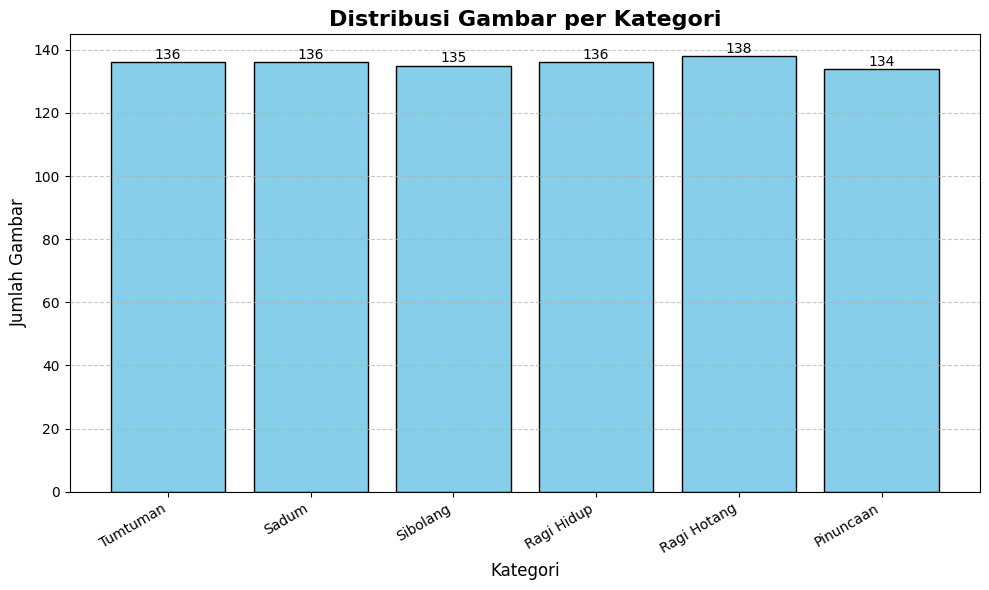

In [ ]:
# Mengimpor library yang diperlukan
import matplotlib.pyplot as plt
import os

# Path dataset (ganti dengan path sesuai struktur folder dataset Anda)
dataset_path = "Train"  # Jika ingin cek "Test", ganti "Train" dengan "Test"

# Mendapatkan daftar kategori (subfolder) dalam dataset
categories = os.listdir(dataset_path)

# Hitung jumlah gambar per kategori
class_counts = {cat: len(os.listdir(os.path.join(dataset_path, cat))) for cat in categories}

# Membuat plot distribusi
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.keys(), class_counts.values(), color='skyblue', edgecolor='black')

# Menambahkan anotasi jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, str(yval), ha='center', fontsize=10)

# Mengatur judul dan label
plt.title("Distribusi Gambar per Kategori", fontsize=16, fontweight='bold')
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Jumlah Gambar", fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()  # Menyesuaikan tata letak agar lebih rapi
plt.show()


In [ ]:
# Mengimpor library yang diperlukan
import numpy as np

# Total jumlah gambar
total_images = sum(class_counts.values())

# Hitung rata-rata jumlah gambar per kategori
mean_images = total_images / len(class_counts)

# Standar deviasi distribusi gambar
std_dev = np.std(list(class_counts.values()))

# Menampilkan hasil analisis
print(f"Total gambar: {total_images}")
print(f"Rata-rata jumlah gambar per kategori: {mean_images:.2f}")
print(f"Standar deviasi distribusi: {std_dev:.2f}")

# Analisis keseimbangan dataset
threshold = 0.1 * mean_images  # Batas 10% dari rata-rata sebagai ambang keseimbangan
if std_dev > threshold:
    print("Dataset kemungkinan TIDAK seimbang.")
    print(f"Threshold keseimbangan (10% dari rata-rata): {threshold:.2f}")
else:
    print("Dataset kemungkinan CUKUP seimbang.")
    print(f"Threshold keseimbangan (10% dari rata-rata): {threshold:.2f}")


Total gambar: 815
Rata-rata jumlah gambar per kategori: 135.83
Standar deviasi distribusi: 1.21
Dataset kemungkinan CUKUP seimbang.
Threshold keseimbangan (10% dari rata-rata): 13.58


In [ ]:
# Mengimpor library yang diperlukan
from PIL import Image
import numpy as np
import os

# Path dataset (ganti dengan path sesuai struktur folder dataset Anda)
dataset_path = "Train"  # Ganti dengan "Test" jika ingin menganalisis folder Test

# Mendapatkan daftar kategori (subfolder) dalam dataset
categories = os.listdir(dataset_path)

# Analisis tipe data piksel
print("Analisis Tipe Data Piksel:")
print("-" * 40)
for category in categories:
    category_path = os.path.join(dataset_path, category)
    analyzed = False  # Flag untuk memastikan hanya satu file per kategori
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            with Image.open(img_path) as img:
                img_array = np.array(img)  # Konversi ke array numpy
                print(f"Kategori: {category}")
                print(f"  - File: {img_name}")
                print(f"  - Dimensi Array: {img_array.shape}")
                print(f"  - Tipe Data Piksel: {img_array.dtype}")
                analyzed = True
                break  # Hentikan setelah satu file dianalisis
        except Exception as e:
            print(f"Error membaca file: {img_path}, {e}")
    if not analyzed:
        print(f"Tidak ada file yang valid di kategori: {category}")
print("-" * 40)


Analisis Tipe Data Piksel:
----------------------------------------
Kategori: Tumtuman
  - File: WhatsApp Image 2024-07-06 at 00.02.57 (24).jpeg
  - Dimensi Array: (256, 256, 3)
  - Tipe Data Piksel: uint8
Kategori: Sadum
  - File: IMG_20240705_231538_32.jpg
  - Dimensi Array: (256, 256, 3)
  - Tipe Data Piksel: uint8
Kategori: Sibolang
  - File: 1000104024.jpg
  - Dimensi Array: (256, 256, 3)
  - Tipe Data Piksel: uint8
Kategori: Ragi Hidup
  - File: IMG_5216.PNG
  - Dimensi Array: (256, 256, 3)
  - Tipe Data Piksel: uint8
Kategori: Ragi Hotang
  - File: IMG_20240705_231128_49.jpg
  - Dimensi Array: (256, 256, 3)
  - Tipe Data Piksel: uint8
Kategori: Pinuncaan
  - File: IMG_E5313.JPG
  - Dimensi Array: (256, 256, 3)
  - Tipe Data Piksel: uint8
----------------------------------------


Menampilkan contoh gambar dari setiap kategori:
--------------------------------------------------


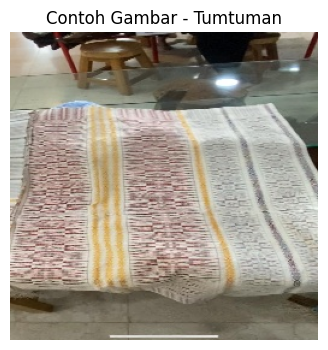

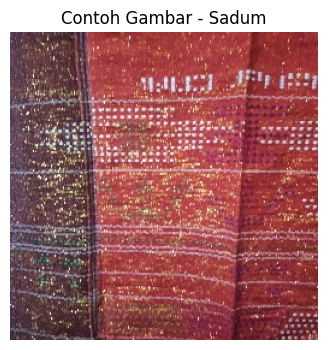

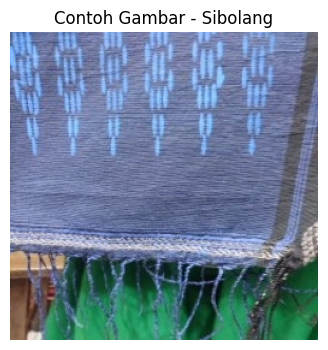

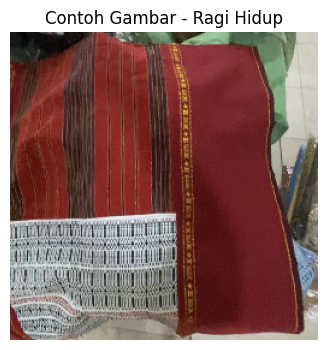

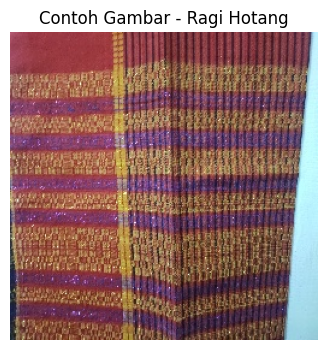

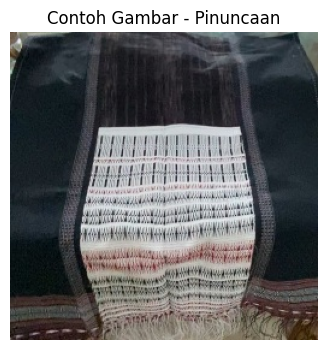

--------------------------------------------------


In [ ]:
# Mengimpor library yang diperlukan
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Path dataset
dataset_path = "Train"

# Mendapatkan daftar kategori (subfolder) dalam dataset
categories = os.listdir(dataset_path)

# Visualisasi contoh gambar dari setiap kategori
print("Menampilkan contoh gambar dari setiap kategori:")
print("-" * 50)
for category in categories:
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        try:
            sample_image_name = os.listdir(category_path)[0]
            sample_image_path = os.path.join(category_path, sample_image_name)
            with Image.open(sample_image_path) as img:
                plt.figure(figsize=(4, 4))
                plt.imshow(np.array(img))
                plt.title(f"Contoh Gambar - {category}", fontsize=12)
                plt.axis('off')
                plt.show()
        except IndexError:
            print(f"Tidak ada gambar dalam kategori: {category}")
        except Exception as e:
            print(f"Error membuka gambar di kategori {category}: {e}")
print("-" * 50)


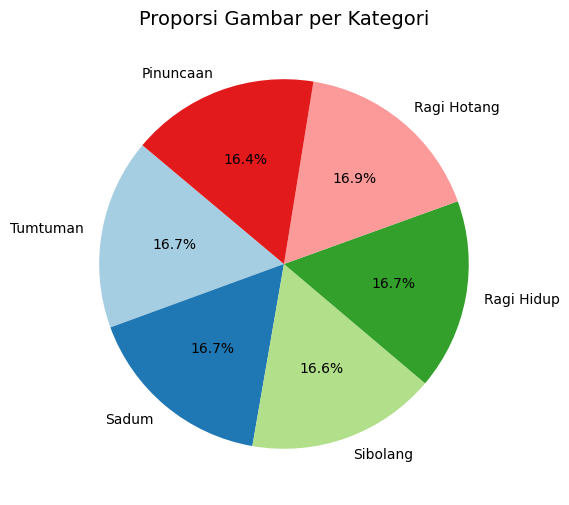

In [ ]:
# Mengimpor library yang diperlukan
import matplotlib.pyplot as plt

# Pie chart untuk proporsi gambar per kategori
plt.figure(figsize=(8, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Menambahkan judul dan menyesuaikan label
plt.title("Proporsi Gambar per Kategori", fontsize=14)

# Menampilkan chart
plt.show()


# Data Preparation

## Memvalidasi Format Gambar

In [ ]:
import os
import imghdr

img_ext = ['jpg', 'jpeg', 'bmp', 'png']

for image_class in os.listdir(train_path):
    class_path = os.path.join(train_path, image_class)
    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        if not os.path.isfile(image_path):
            continue
        if imghdr.what(image_path) not in img_ext:
            print(f"Invalid format: {image_path}")
            os.remove(image_path)


## Mengubah Ukuran Gambar

In [ ]:
import cv2

target_size = (256, 256)

for image_class in os.listdir(train_path):
    class_path = os.path.join(train_path, image_class)
    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        try:
            img = cv2.imread(image_path)
            resized_img = cv2.resize(img, target_size)
            cv2.imwrite(image_path, resized_img)
        except Exception as e:
            print(f"Error processing image {image_path}: {e}")


## Preprocessing Gambar

In [ ]:
import numpy as np

def normalize_image(image):
    return image / 255.0


In [ ]:
def preprocess_images(dataset_path, target_size):
    X, y = [], []
    class_labels = {cls: idx for idx, cls in enumerate(os.listdir(dataset_path))}

    for image_class in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, image_class)
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try:
                img = cv2.imread(image_path)
                resized_img = cv2.resize(img, target_size)
                normalized_img = normalize_image(resized_img)
                flattened_img = normalized_img.flatten()
                X.append(flattened_img)
                y.append(class_labels[image_class])
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

    return np.array(X), np.array(y)

X, y = preprocess_images(train_path, target_size)


## Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)


# Build Model

In [ ]:
# Importing the required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the KNN model with the chosen number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn.fit(X_train, y_train)

# If you want to tune hyperparameters, such as the number of neighbors, you can use GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Display the best parameter found
best_knn = grid_search.best_estimator_


##Pelatihan Model

In [ ]:
# Latih model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

##Visualisasi Hasil Pelatihan

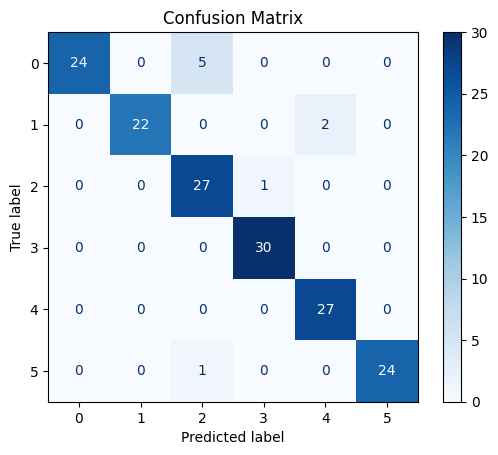

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prediksi pada data uji
y_pred = knn_model.predict(X_test)

# Visualisasi confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Panggil fungsi
plot_confusion_matrix(y_test, y_pred)


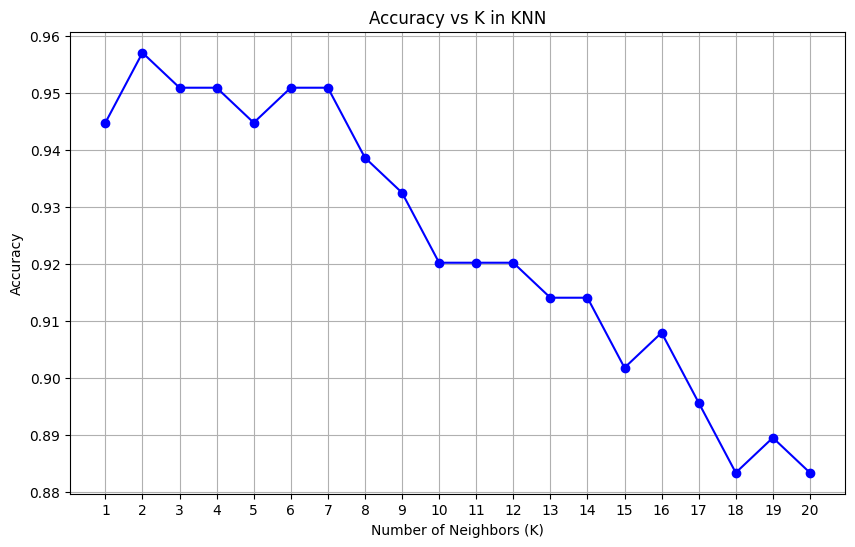

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Uji berbagai nilai K
k_values = range(1, 21)  # Uji nilai K dari 1 hingga 20
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Visualisasi akurasi vs K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K in KNN')
plt.xticks(k_values)
plt.grid()
plt.show()


## Evaluasi

In [ ]:
# Evaluate the model using the test data
y_pred = knn.predict(X_test)

# Print classification report for performance evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Evaluate the best model with the optimized hyperparameters
y_pred_best = best_knn.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        29
           1       0.81      0.92      0.86        24
           2       0.80      1.00      0.89        28
           3       0.92      0.77      0.84        30
           4       0.84      0.96      0.90        27
           5       1.00      0.80      0.89        25

    accuracy                           0.88       163
   macro avg       0.90      0.88      0.88       163
weighted avg       0.90      0.88      0.88       163

Accuracy: 0.88


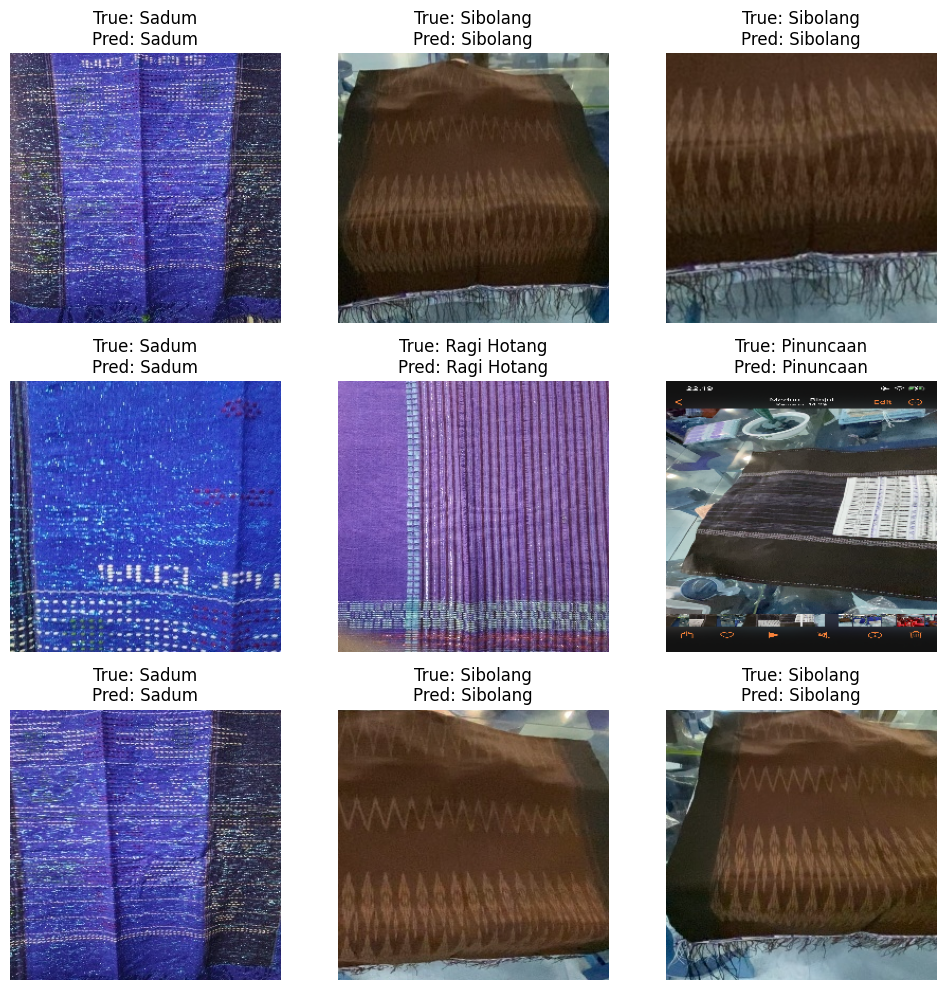

In [ ]:
import matplotlib.pyplot as plt

def show_predictions(X_test, y_test, y_pred, class_labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        img = X_test[i].reshape(target_size[0], target_size[1], 3) * 255.0
        plt.imshow(img.astype("uint8"))
        plt.title(f"True: {class_labels[y_test[i]]}\nPred: {class_labels[y_pred[i]]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

class_labels_rev = {idx: cls for cls, idx in class_labels.items()}
show_predictions(X_test, y_test, y_pred, class_labels_rev)


#Prediksi Gambar

In [ ]:
import cv2
import numpy as np

# Fungsi untuk memuat gambar dan membuat prediksi
def predict_image(model, image_path, image_size=(256, 256)):
    # Muat gambar
    image = cv2.imread(image_path)  # Read image in color
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    image = cv2.resize(image, image_size)
    image = normalize_image(image)
    image = image.flatten()
    image = image.reshape(1, -1)

    class_labels = {
        0: 'Tumtuman',
        1: 'Sadum',
        2: 'Sibolang',
        3: 'Ragi Hidup',
        4: 'Ragi Hotang',
        5: 'Pinuncaan'
    }

    # Prediksi
    prediction = model.predict(image)[0]  # Get the predicted class label

    # Get the class name using the predicted label
    predicted_class_name = class_labels[prediction]

    print(f"Predicted class label: {prediction}")
    print(f"Predicted class name: {predicted_class_name}")

    return prediction

# Assuming knn_model or best_knn is the trained model
predicted_class = predict_image(knn_model, "/content/Test/Sadum/IMG_20240611_193241.jpg")

Predicted class label: 1
Predicted class name: Sadum


##Menyimpan dan Memuat Model

In [ ]:
import pickle

# Replace 'model' with the actual variable name of your trained model (knn_model or best_knn)
with open('ulos_knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

In [ ]:
from google.colab import files

# Path to the file you want to download
file_path = '/content/ulos_knn_model.pkl'

# Download the file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>